In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore",category= FutureWarning)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


In [2]:
train = pd.read_csv("train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train["Item_Visibility"].value_counts()


0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [4]:
train["Item_Visibility"].replace([train["Item_Visibility"].mode()],train["Item_Visibility"].median(),inplace=True)

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.069460,140.992782,1997.831867,2181.288914
std,4.643456,0.048893,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train.shape

(8523, 12)

In [7]:
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.069460,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.048893,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.003575,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.033085,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
# find null value columns
for feature in train.columns:
    if train[feature].isnull().sum() > 0:
        print(feature)

Item_Weight
Outlet_Size


In [9]:
nullcols = [feature for feature in train.columns if train[feature].isnull().sum()>0]

In [10]:
nullcols

['Item_Weight', 'Outlet_Size']

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
trainNullvaluePer = train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount = train.isnull().sum()
trainNullDf = pd.DataFrame([trainNullvaluePer,trainNullCount]).T
trainNullDf.columns = ["Nullper","Nullvalues"]
trainNullDf.sort_values(by = 'Nullvalues',ascending=False,inplace=True)
trainNullDf.reset_index(inplace=True)
trainNullDf.head()

,index,Nullper,Nullvalues
0,Outlet_Size,28.28,2410.0
1,Item_Weight,17.17,1463.0
2,Item_Identifier,0.00,0.0
3,Item_Fat_Content,0.00,0.0
4,Item_Visibility,0.00,0.0


In [13]:
NUll_cols = np.array(trainNullDf[:2]["index"])
NUll_cols

array(['Outlet_Size', 'Item_Weight'], dtype=object)

In [14]:
# train.drop(["Outlet_Size","Item_Weight"],axis=1,inplace=True)

In [15]:
for column in NUll_cols:
    if train[column].dtype == "object":
        print(column)
        train[column].fillna(train[column].mode()[0],inplace=True)
    else :
        print(f"{column} this is numerical")
        train[column].fillna(train[column].median(),inplace=True)
        

Outlet_Size
Item_Weight this is numerical


In [16]:
trainNullPer= train.apply(lambda x : np.round(100*x.isnull().sum()/train.shape[0],2))
trainNullCount=train.isnull().sum()
trainNullDF=pd.DataFrame([trainNullCount,trainNullPer]).T
trainNullDF.columns=['NullValues','NullPercentage']
trainNullDF.sort_values(by='NullValues',ascending=False,inplace=True)
trainNullDF.reset_index(inplace=True)
trainNullDF.head()

,index,NullValues,NullPercentage
0,Item_Identifier,0.0,0.0
1,Item_Weight,0.0,0.0
2,Item_Fat_Content,0.0,0.0
3,Item_Visibility,0.0,0.0
4,Item_Type,0.0,0.0


In [17]:
numericalcolumns = train.select_dtypes(include=np.number).columns
numericalcolumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
objectColumns = train.select_dtypes(include = np.object).columns
objectColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

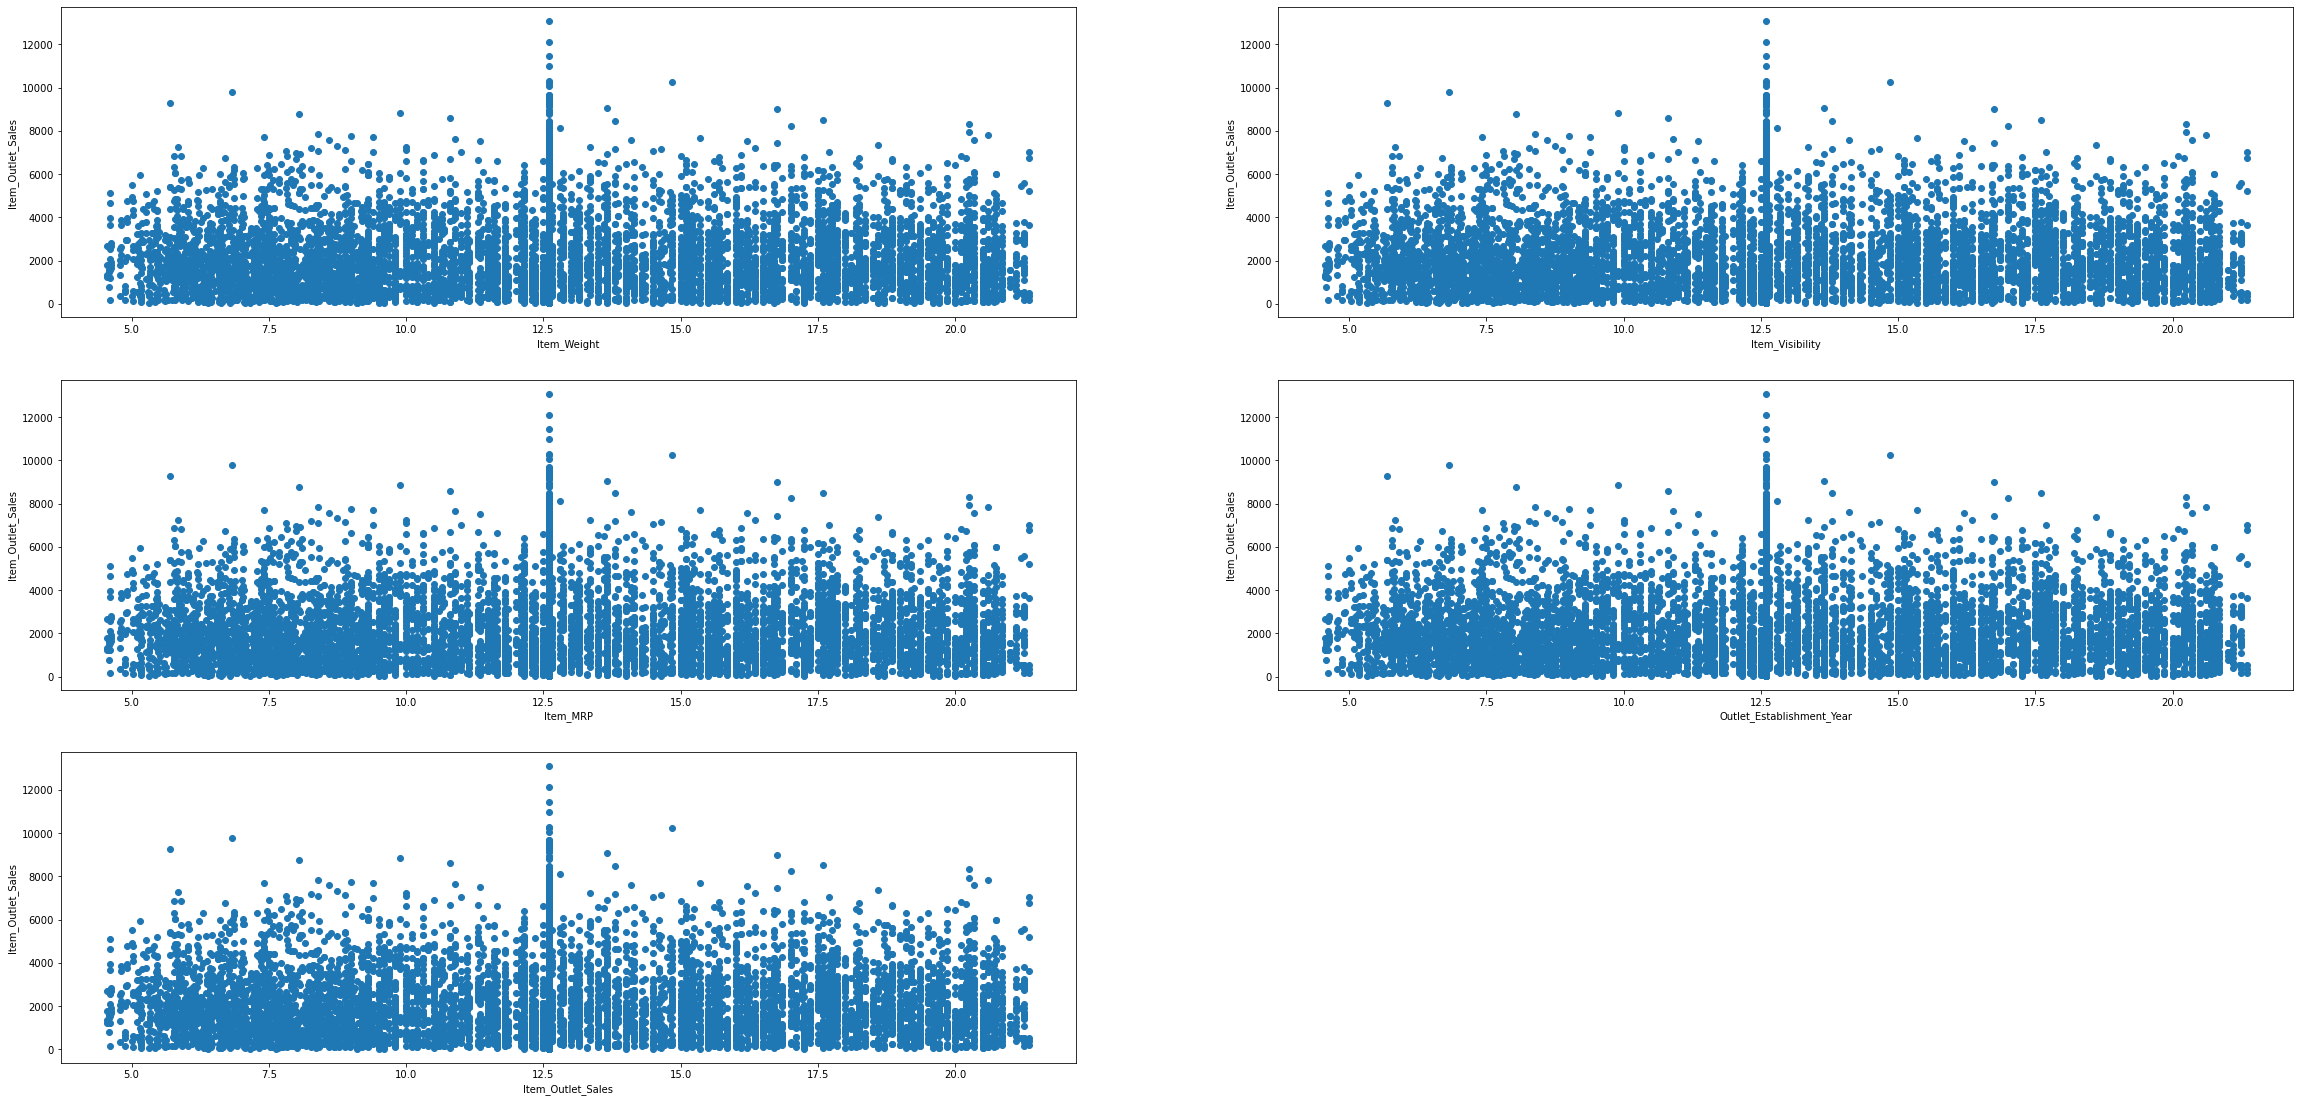

In [19]:
j = 0
plt.figure(figsize=(40,40))
for columns in numericalcolumns:
    plt.subplot(6,2,j+1)
    plt.scatter(train[column],train['Item_Outlet_Sales'])
    plt.xlabel(columns)
    plt.ylabel("Item_Outlet_Sales")
    j+=1



In [20]:
continousCols = []
DiscreteCols = []

for column in numericalcolumns:
    if train[column].nunique() > 20:
        continousCols.append(column)
    else:
        DiscreteCols.append(column)

In [21]:
continousCols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [22]:
DiscreteCols

['Outlet_Establishment_Year']

In [23]:
train['Outlet_Establishment_Year'].nunique()

9

In [24]:
train['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

<BarContainer object of 8523 artists>

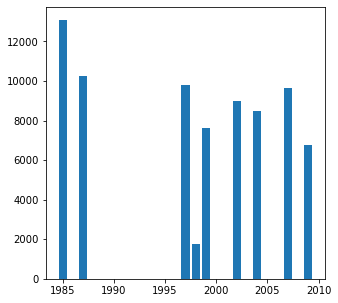

In [25]:
j = 0
plt.figure(figsize=(5,5))
plt.subplot(1,1,j+1)
plt.bar(train["Outlet_Establishment_Year"],train["Item_Outlet_Sales"])


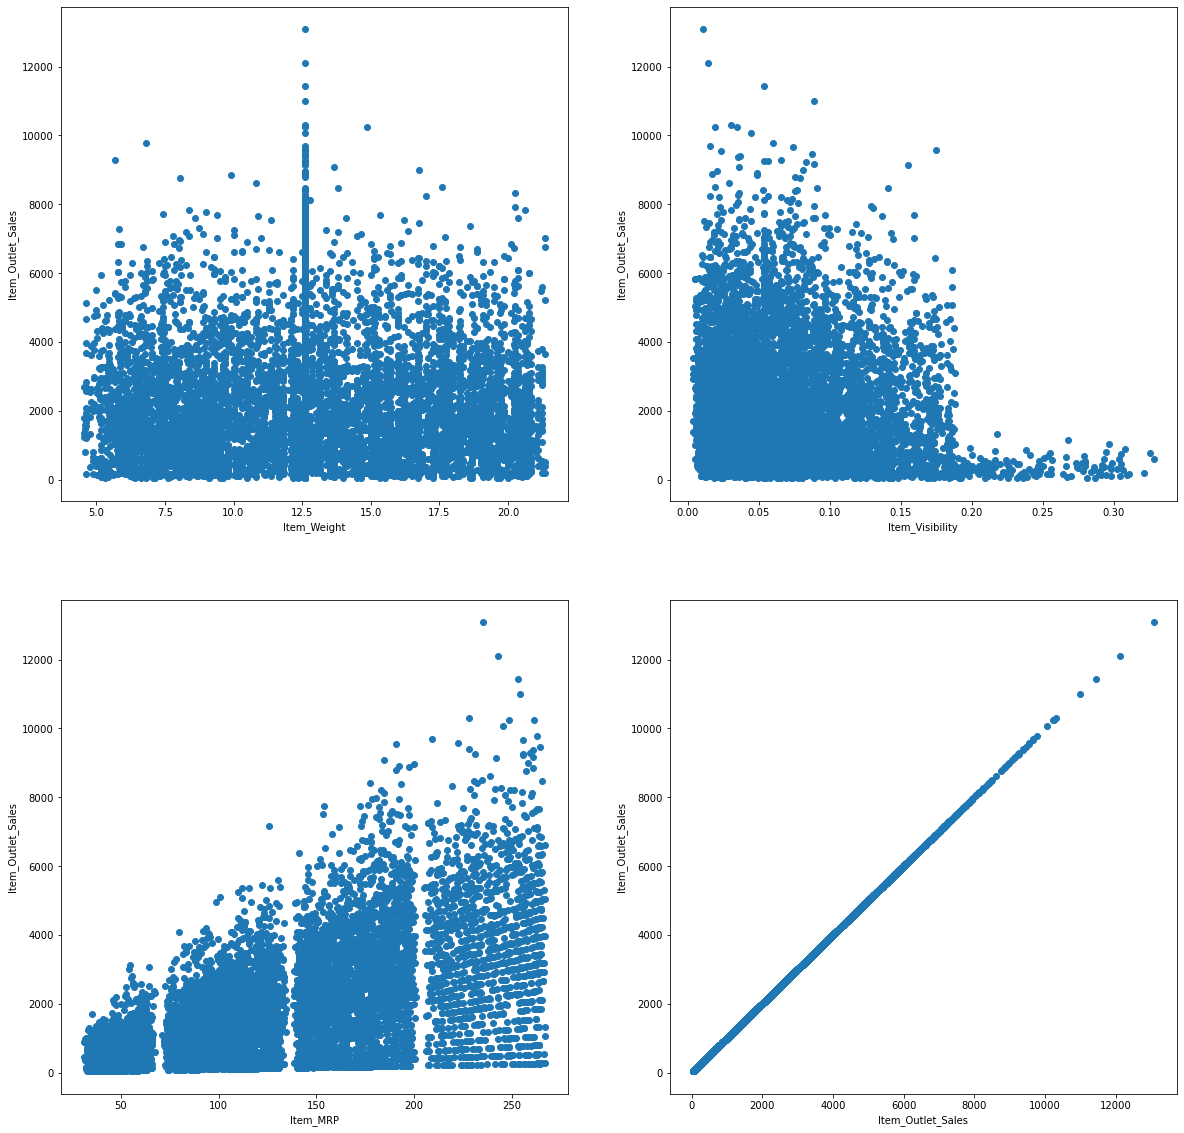

In [26]:
j = 0 
plt.figure(figsize=(20,20))
for column in continousCols:
    plt.subplot(2,2,j+1)
    plt.scatter(train[column],train["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales")
    j+=1



In [27]:
import scipy.stats as stat 
import pylab

In [28]:
def plot_data(train,feature):
    plt.figure(figsize=(10,6))#length height
    plt.subplot(1,2,1)# creating plot with 2 col and last 1 difine no using 1 col
    train[feature].hist()
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales") 
    plt.subplot(1,2,2)
    stat.probplot(train[feature],dist='norm',plot = pylab)
    plt.show()


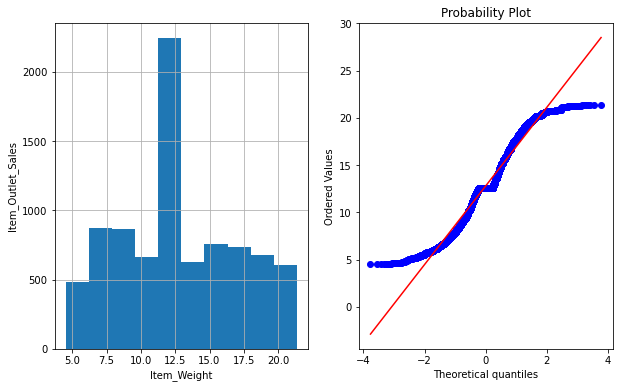

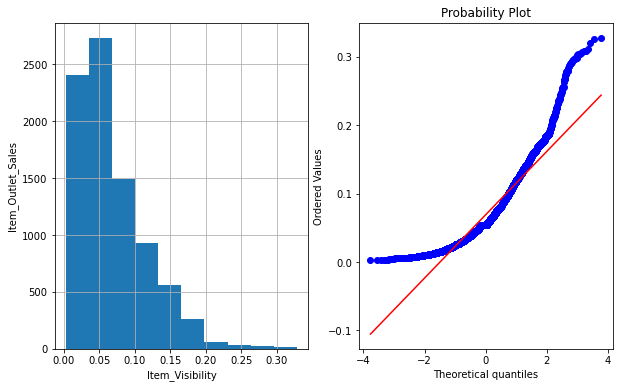

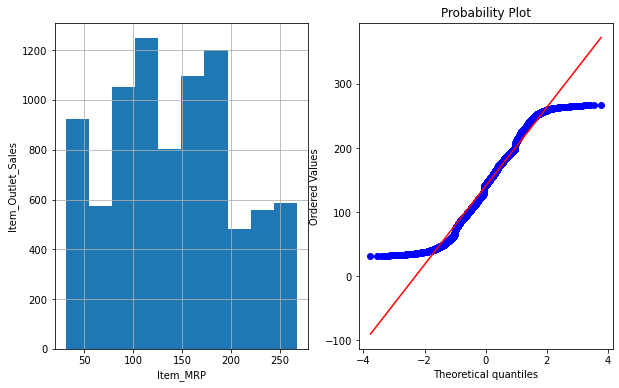

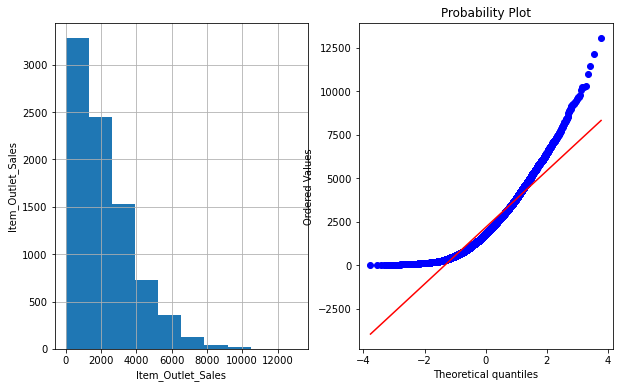

In [29]:
for column in continousCols:
    plot_data(train,column)

<AxesSubplot:xlabel='Item_Weight'>

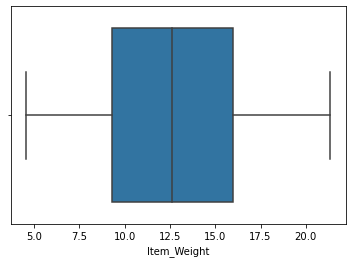

In [30]:
sns.boxplot('Item_Weight',data = train)

<AxesSubplot:xlabel='Item_MRP'>

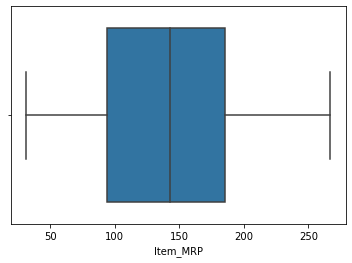

In [31]:
sns.boxplot('Item_MRP',data = train)

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

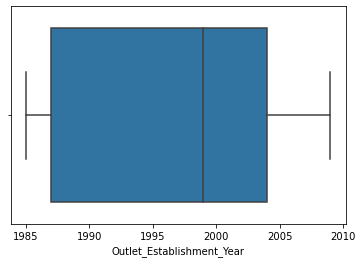

In [32]:
sns.boxplot('Outlet_Establishment_Year',data = train)

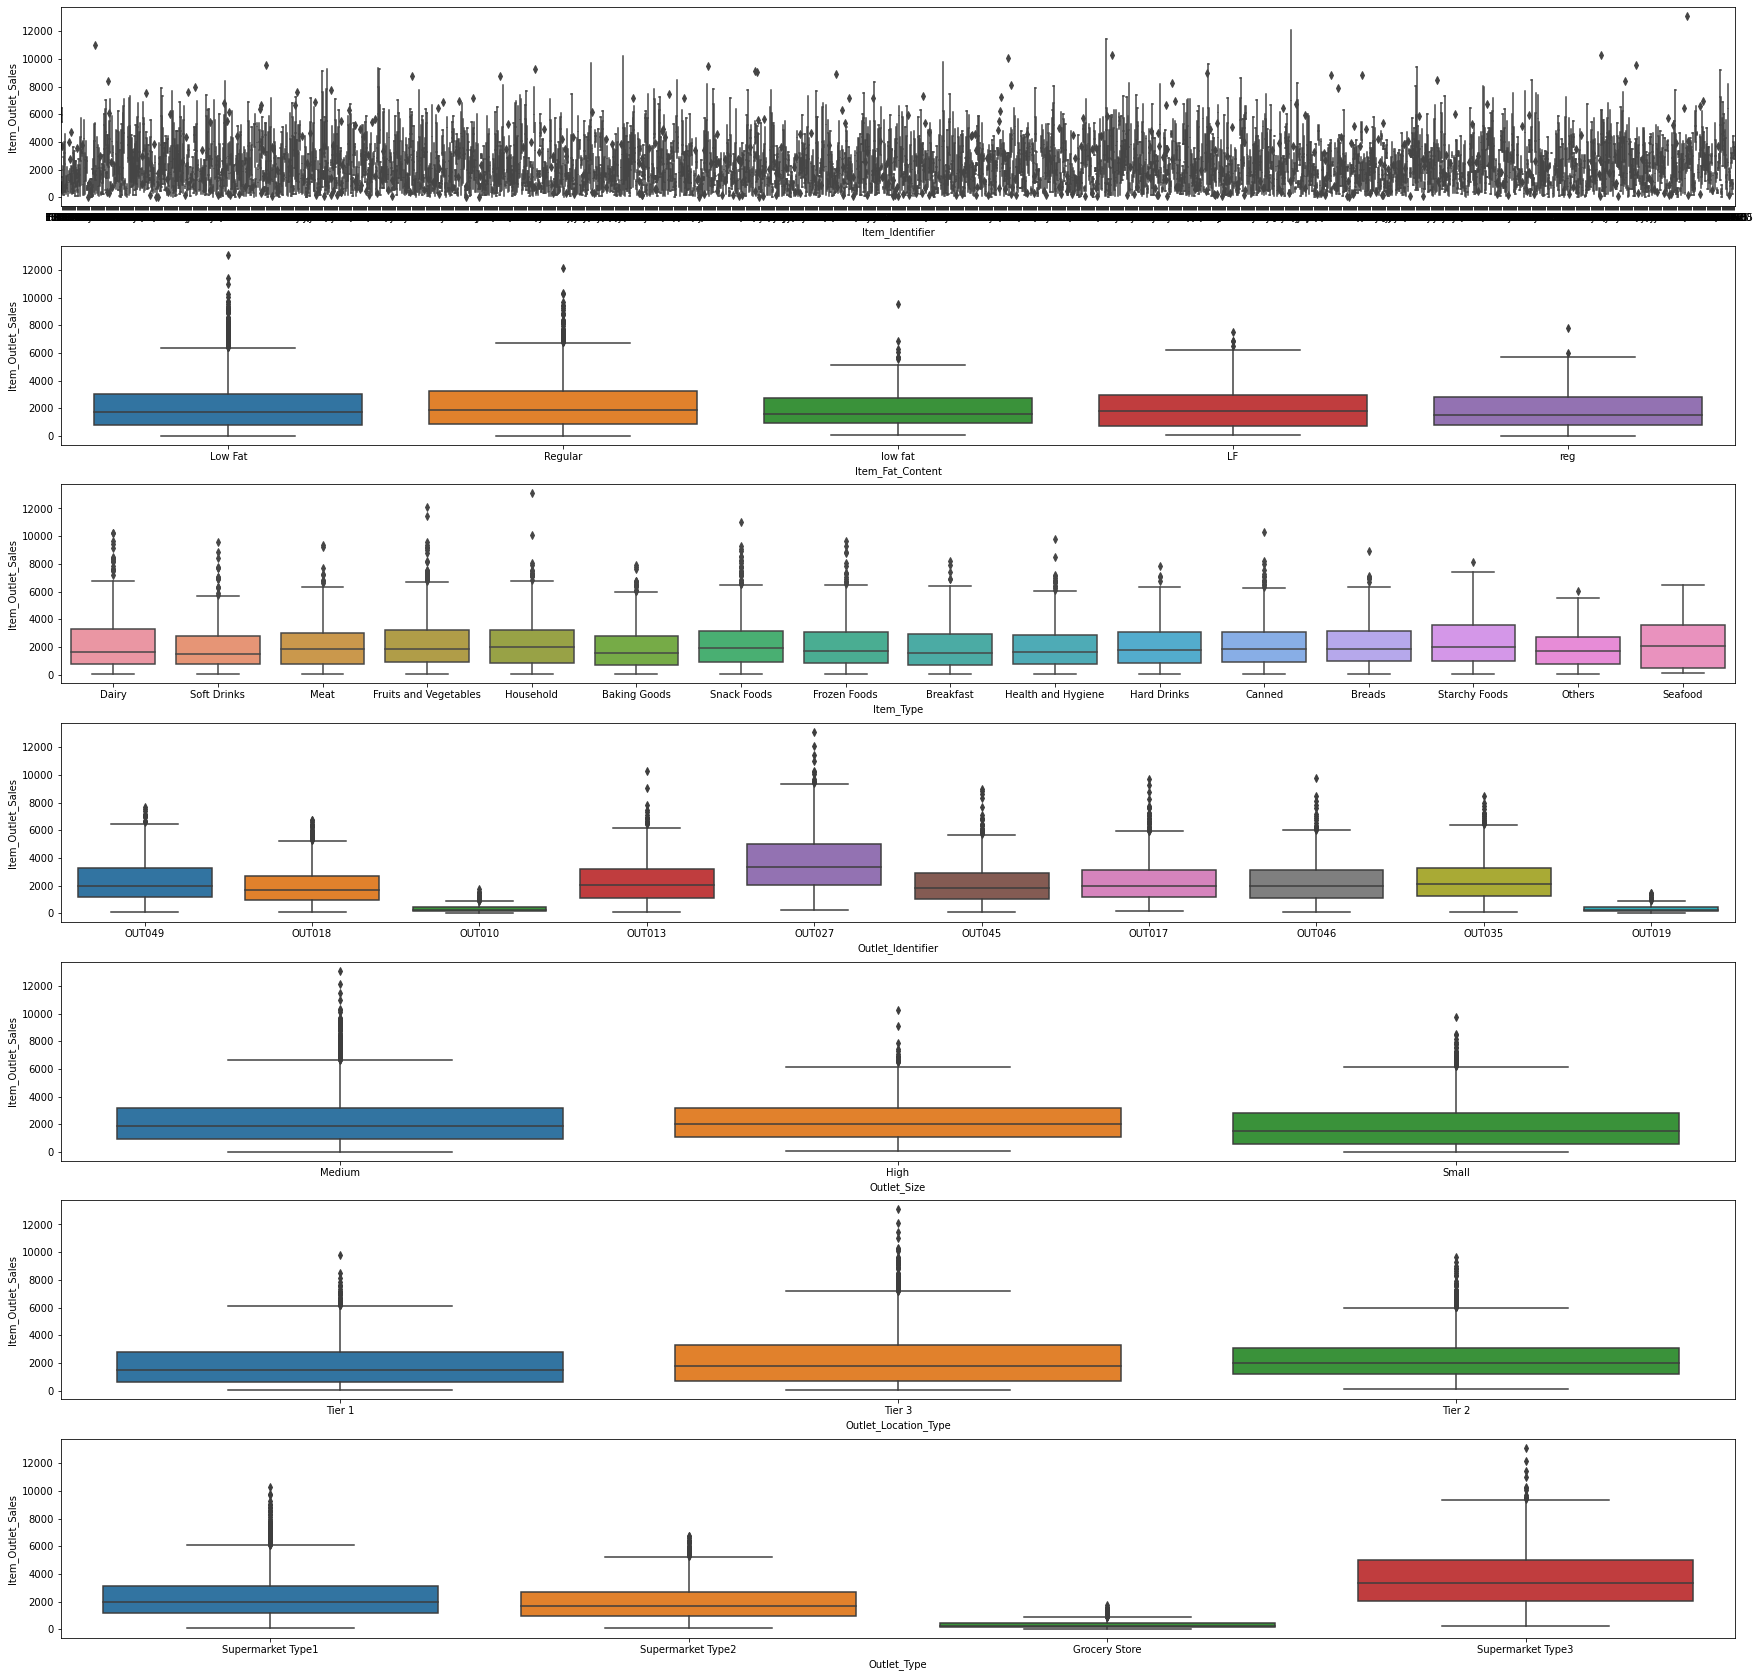

In [33]:
j = 0
plt.figure(figsize=(30,30))
for cols in objectColumns:
    plt.subplot(7,1,j+1)
    sns.boxplot(x = cols,y= 'Item_Outlet_Sales',data=train)
    j+=1

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

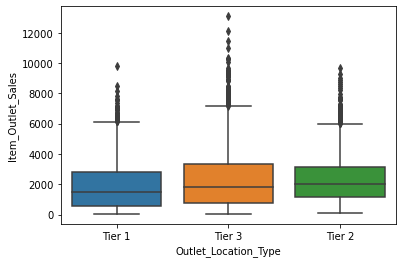

In [34]:
sns.boxplot(x = 'Outlet_Location_Type',y ='Item_Outlet_Sales',data = train)

In [35]:
numericalcolumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

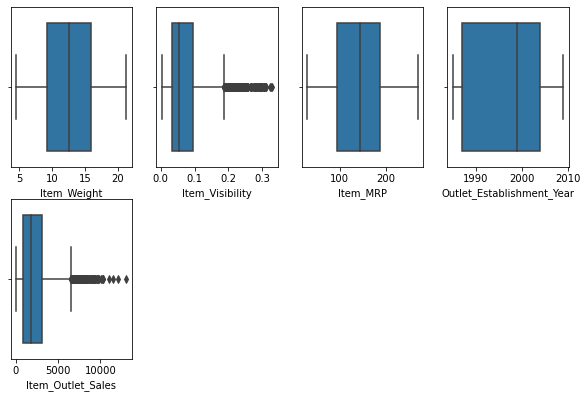

In [36]:
j = 0
plt.figure(figsize=(10,10))
for cols in numericalcolumns:
    plt.subplot(3,4,j+1)
    sns.boxplot(cols,data=train)
    j+=1

In [37]:
train[objectColumns].head(40)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
6,FDO10,Regular,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
7,FDP10,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type3
8,FDH17,Regular,Frozen Foods,OUT045,Medium,Tier 2,Supermarket Type1
9,FDU28,Regular,Frozen Foods,OUT017,Medium,Tier 2,Supermarket Type1


In [38]:
continousCols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [39]:
for cols in continousCols:
    upper_lim = train[cols].mean()+train[cols].std() *3
    lower_lim = train[cols].mean()-train[cols].std() *3

    train.loc[(train[cols] > upper_lim),cols] = upper_lim
    train.loc[(train[cols] < lower_lim),cols] = lower_lim

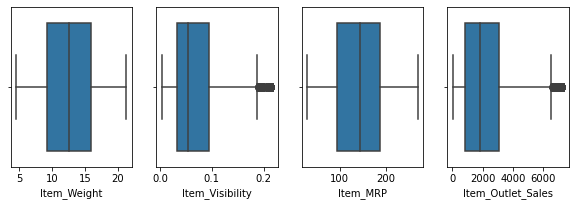

In [91]:
j = 0
plt.figure(figsize=(10,10))
for cols in continousCols:
    plt.subplot(3,4,j+1)
    sns.boxplot(cols,data=train)
    j+=1

In [86]:
upper_lim

7300.787760776532

In [42]:
lower_lim

-2938.209933626459

In [43]:
train[train['Item_Visibility'] > upper_lim]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [44]:
train[(train['Item_Visibility'] <= upper_lim) & (train['Item_Visibility'] >= lower_lim) ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [45]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.068929,140.992782,1997.831867,2169.064715
std,4.22724,0.046897,62.275067,8.371760,1661.273963
min,4.55500,0.003575,31.290000,1985.000000,33.290000
25%,9.31000,0.033085,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.216139,266.888400,2009.000000,7300.787761


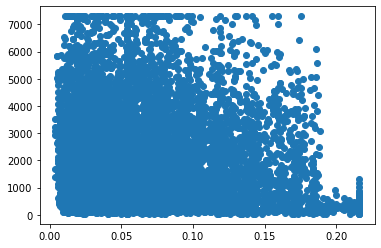

In [94]:
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'])

In [47]:
#trainObjectDF = train[objectColumns]
#trainObjectDF.drop(['Item_Identifier'],axis=1,inplace =True)

In [48]:
train['Outlet_Identifier'].nunique()

10

In [49]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.053931,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [52]:
objectColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [53]:
trainObjectDF = train[objectColumns]

In [54]:
from collections import defaultdict
deafaultEncoder = defaultdict(LabelEncoder)
fittrainObjectDF = trainObjectDF.apply(lambda x : deafaultEncoder[x.name].fit_transform(x))

In [55]:
fittrainObjectDF

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1
8519,897,2,0,7,1,1,1
8520,1357,1,8,6,2,1,1
8521,681,2,13,3,1,2,2


In [58]:
train.drop(train[objectColumns],axis=1,inplace=True)

In [59]:
updatedDF = pd.concat([train,fittrainObjectDF],axis=1)

In [60]:
updatedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
 5   Item_Identifier            8523 non-null   int32  
 6   Item_Fat_Content           8523 non-null   int32  
 7   Item_Type                  8523 non-null   int32  
 8   Outlet_Identifier          8523 non-null   int32  
 9   Outlet_Size                8523 non-null   int32  
 10  Outlet_Location_Type       8523 non-null   int32  
 11  Outlet_Type                8523 non-null   int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [62]:
corrDF = updatedDF.corr()

In [63]:
corrDF.sum()

Item_Weight                  1.052726
Item_Visibility              0.515823
Item_MRP                     1.649820
Outlet_Establishment_Year    0.951841
Item_Outlet_Sales            2.007061
Item_Identifier              0.896073
Item_Fat_Content             0.790736
Item_Type                    0.918013
Outlet_Identifier            1.018667
Outlet_Size                  0.845643
Outlet_Location_Type         0.113817
Outlet_Type                  1.459488
dtype: float64

In [67]:
corrColumns = abs(corrDF['Item_Outlet_Sales']).sort_values(ascending = False)

In [68]:
corrColumns

Item_Outlet_Sales            1.000000
Item_MRP                     0.572033
Outlet_Type                  0.400809
Outlet_Identifier            0.166349
Item_Visibility              0.129152
Outlet_Size                  0.086717
Outlet_Location_Type         0.086254
Outlet_Establishment_Year    0.042671
Item_Type                    0.017307
Item_Weight                  0.010340
Item_Fat_Content             0.009672
Item_Identifier              0.002839
Name: Item_Outlet_Sales, dtype: float64

In [69]:
y = updatedDF['Item_Outlet_Sales']


X = updatedDF.drop(['Item_Outlet_Sales'],axis=1)

In [71]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,1999,156,1,4,9,1,0,1
1,5.92,0.019278,48.2692,2009,8,2,14,3,1,2,2
2,17.50,0.016760,141.6180,1999,662,1,10,9,1,0,1
3,19.20,0.053931,182.0950,1998,1121,2,6,0,1,2,0
4,8.93,0.053931,53.8614,1987,1297,1,9,1,0,2,1


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33,random_state=42)

In [73]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
3288,12.600,0.031187,39.5480,1985,1377,1,11,5,1,2,3
2206,12.650,0.076199,191.3846,2002,861,2,5,7,1,1,1
170,14.500,0.019472,164.8210,2004,1401,1,11,6,2,1,1
6526,12.600,0.057762,237.3564,1985,1001,2,6,5,1,2,3
135,7.235,0.076856,116.0492,1997,1428,1,9,8,2,0,1


In [74]:
sc_X = StandardScaler()
X_train  =pd.DataFrame(sc_X.fit_transform(X_train),columns = X_train.columns)
X_test =pd.DataFrame(sc_X.transform(X_test),columns = X_test.columns)

In [76]:
sc_X.mean_

array([1.28862811e+01, 6.85337781e-02, 1.41908529e+02, 1.99784956e+03,
       7.83091769e+02, 1.36339755e+00, 7.27075306e+00, 4.70770578e+00,
       1.17075306e+00, 1.12206655e+00, 1.21050788e+00])

In [77]:
lr = LinearRegression()
#train the moedel using the training sets

lr.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = lr.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1287787.204859573

In [81]:
sc_y = StandardScaler()
y_train = pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1,1)))
y_test = pd.DataFrame(sc_y.transform(np.array([y_test]).reshape(-1,1)))

In [82]:
y_test.head()

,0
0,-0.272736
1,-1.100846
2,-1.088516
3,2.138010
4,0.093987


In [97]:
lr_scaled.score(X_train,y_train)

0.5148363981708681

In [83]:
lr_scaled = LinearRegression()

lr_scaled.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred_scaled = lr.predict(X_test)
y_pred_scaled


array([1095.57243244,  620.33318304, 1132.23905781, ..., 2667.71753641,
       3089.73780611, 1200.596101  ])

In [96]:
lr_scaled.score(X_test,y_test)

0.5172214916445338

In [85]:
mean_squared_error(y_test,y_pred_scaled)

6050697.696809658

In [101]:
r2_score=[]
adjusted_r2=[]
feature_names=[]

for i in range(1,20):
    feature_names.append(X_train.columns[:i].to_list())
    lr =LinearRegression()
    lr.fit(X_train[X_train.columns[:i]],y_train)
    R2=lr.score(X_test[X_test.columns[:i]],y_test)
    r2_score.append(R2)

    n=len(X_train)
    p=i
    adjR2=1-((1-R2) * (n-1)/(n-p-1)) 
    adjusted_r2.append(adjR2)

In [102]:
df =pd.DataFrame(np.column_stack((r2_score,adjusted_r2)),columns=['R2',"Adjusted R2"])
df['feature Name'] = feature_names

In [109]:
feature_names

[['Item_Weight'],
 ['Item_Weight', 'Item_Visibility'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'],
 ['Item_Weight',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Establishment_Year',
  'Item_Identifier'],
 ['Item_Weight',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Establishment_Year',
  'Item_Identifier',
  'Item_Fat_Content'],
 ['Item_Weight',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Establishment_Year',
  'Item_Identifier',
  'Item_Fat_Content',
  'Item_Type'],
 ['Item_Weight',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Establishment_Year',
  'Item_Identifier',
  'Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier'],
 ['Item_Weight',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Establishment_Year',
  'Item_Identifier',
  'Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size'],
 ['Item_Weight',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Establishment_Year',
  'Item_Identi

In [103]:
df

,R2,Adjusted R2,feature Name
0,-0.003292,-0.003468,[Item_Weight]
1,0.010105,0.009758,"[Item_Weight, Item_Visibility]"
2,0.332067,0.331716,"[Item_Weight, Item_Visibility, Item_MRP]"
3,0.334142,0.333676,"[Item_Weight, Item_Visibility, Item_MRP, Outle..."
4,0.334290,0.333706,"[Item_Weight, Item_Visibility, Item_MRP, Outle..."
5,0.334303,0.333602,"[Item_Weight, Item_Visibility, Item_MRP, Outle..."
6,0.334230,0.333413,"[Item_Weight, Item_Visibility, Item_MRP, Outle..."
7,0.362077,0.361181,"[Item_Weight, Item_Visibility, Item_MRP, Outle..."
8,0.388518,0.387553,"[Item_Weight, Item_Visibility, Item_MRP, Outle..."
9,0.446820,0.445849,"[Item_Weight, Item_Visibility, Item_MRP, Outle..."


In [104]:
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train)
FinalInfo = mod.fit()
FinalInfo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      0   R-squared (uncentered):                   0.515
Model:                            OLS   Adj. R-squared (uncentered):              0.514
Method:                 Least Squares   F-statistic:                              549.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                        0.00
Time:                        23:55:37   Log-Likelihood:                         -6037.2
No. Observations:                5710   AIC:                                  1.210e+04
Df Residuals:                    5699   BIC:                                  1.217e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight                  -0.0068      0.009     -0.732      0.464      -0.025       0.011
Item_Visibility              -0.0480      0.010     -5.040      0.000      -0.067      -0.029
Item_MRP                      0.5815      0.009     62.981      0.000       0.563       0.600
Outlet_Establishment_Year     0.0119      0.010      1.239      0.215      -0.007       0.031
Item_Identifier               0.0022      0.009      0.239      0.811      -0.016       0.020
Item_Fat_Content              0.0178      0.009      1.908      0.056      -0.000       0.036
Item_Type                     0.0023      0.009      0.243      0.808      -0.016       0.021
Outlet_Identifier             0.1049      0.019      5.590      0.000       0.068       0.142
Outlet_Size                  -0.1397      0.012    -11.520      0.000      -0.163      -0.116
Outlet_Location_Type         -0.1127      0.022     -5.056      0.000      -0.156      -0.069
Outlet_Type                   0.4030      0.015     26.789      0.000       0.374       0.433
==============================================================================
Omnibus:                      208.191   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.750
Skew:                           0.404   Prob(JB):                     3.24e-58
Kurtosis:                       3.677   Cond. No.                         5.07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
FinalInfo.summary2().tables[1]["P>|t|"]

Item_Weight                   4.641396e-01
Item_Visibility               4.787226e-07
Item_MRP                      0.000000e+00
Outlet_Establishment_Year     2.152831e-01
Item_Identifier               8.107371e-01
Item_Fat_Content              5.647430e-02
Item_Type                     8.077930e-01
Outlet_Identifier             2.376771e-08
Outlet_Size                   2.273747e-30
Outlet_Location_Type          4.416743e-07
Outlet_Type                  5.273275e-149
Name: P>|t|, dtype: float64

In [107]:
finalSum = FinalInfo.summary2().tables[1]["P>|t|"]

In [111]:
finalSum[finalSum<=0.05]

Item_Visibility          4.787226e-07
Item_MRP                 0.000000e+00
Outlet_Identifier        2.376771e-08
Outlet_Size              2.273747e-30
Outlet_Location_Type     4.416743e-07
Outlet_Type             5.273275e-149
Name: P>|t|, dtype: float64